### kütüphaneleri import edelim

In [15]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Model yükleyelim

In [2]:
model= tf.keras.models.load_model('trained_model.keras')

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

### Bir tek görüntü üzerinde görselleştirme ve tahmin gerçekleştirme

In [7]:
!pip install opencv-python

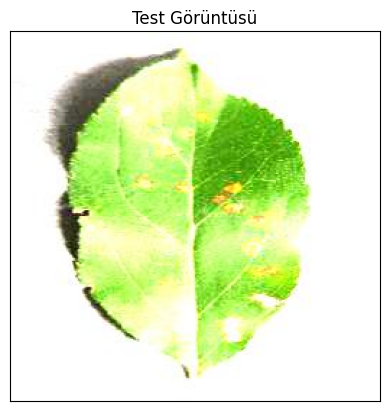

In [4]:
import cv2
image_path ="test/test/AppleCedarRust1.JPG"
# Görüntüyü varsayılan modda okuma
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR'yi RGB'ye dönüştürme
# Görüntüyü görüntüleme
plt.imshow(img)
plt.title('Test Görüntüsü')
plt.xticks([])  # X ekseni işaretlerini gizleme
plt.yticks([])  # Y ekseni işaretlerini gizleme
plt.show()


### Modeli Test edelim

#modeli eğittiğim formatta test etmem daha doğru bir sonucu verecektir.

In [8]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Tek bir görüntüyü bir yığın (batch) haline dönüştür
print(input_arr.shape)

(1, 128, 128, 3)


In [9]:
predictions = model.predict(input_arr)
predictions,predictions.shape

1/1 [==============================] - 5s 5s/step


(array([[1.2100434e-12, 2.1832128e-12, 1.0000000e+00, 1.4010195e-15,
         3.0871533e-10, 1.8261985e-10, 1.0133207e-16, 4.6122958e-13,
         7.6339878e-18, 3.9742066e-16, 6.9982821e-20, 1.5084524e-13,
         2.4323732e-13, 1.4064753e-16, 1.0337255e-14, 1.4145686e-15,
         6.7054511e-13, 1.3602004e-12, 6.4230858e-13, 5.9707642e-11,
         3.4435243e-16, 9.4374124e-16, 3.1971409e-10, 8.1244754e-11,
         1.3117995e-16, 2.3282281e-16, 2.6287588e-13, 6.9876064e-14,
         6.1845928e-12, 1.2533496e-13, 3.4571011e-12, 3.2544729e-16,
         4.0835076e-14, 1.7970712e-16, 1.0035436e-09, 1.2368743e-11,
         3.2671393e-10, 3.3693789e-13]], dtype=float32),
 (1, 38))

In [10]:
result_index = np.argmax(predictions) #Maksimum elemanın indeksini döndür.
print(result_index)

2


In [11]:
class_name=['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

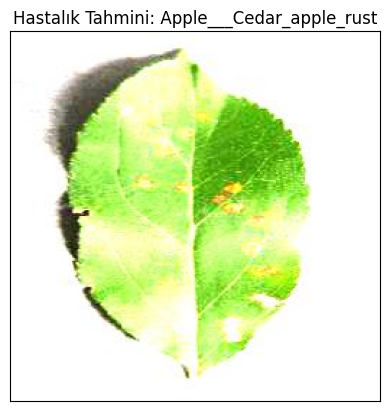

In [12]:
# Hastalık tahminini görüntüleme
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Hastalık Tahmini: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [14]:
model_prediction

'Apple___Cedar_apple_rust'